<div style="text-align: right"> 24.01.2020</div>

***Name: Paul Brase*** 

# Hausaufgabe Blatt 11

## Kinetische Gastheorie: Maxwell-Boltzmann-Verteilung

In dieser Aufgabe werden wir uns mit der kinetischen Gastheorie und der Maxwell-Boltzmann-Verteilung beschäftigen. Die genaue Herleitung der Maxwell-Boltzmann-Verteilung können Sie Kapitel 7.3.5 "Experimentalphysik I" von W. Demtröder entnehmen. 

Betrachtet man die Moleküle eines Gases als Teilchen, die lediglich durch elastische Stöße sowohl mit den Wänden ihrer Umgebung als auch untereinander wechselwirken, so spricht man von einem *idealen Gas*. 

## 1. Aufgabe
Misst man die Beträge der Geschwindigkeiten von einem idealen Gas, so stellt man fest, dass diese durch die Maxwell-Boltzmann-Verteilung beschrieben werden. Hier ist $v$ die Geschwindigkeit der Teilchen, $m$ die Masse der Teilchen, $T$ die Temperatur und $k_B$ die Boltzmann-Konstante 

$$\tag{1}
f\!\left(v\right)=4 \pi v^2 \cdot \left(\frac{m}{2 \pi k_B T}\right)^{3/2} \cdot \exp\left(\frac{-m v^2}{2 k_B T}\right).
$$

Diese Verteilung kann wie folgt begründet werden. Da keine Raumrichtung ausgezeichnet ist und die Teilchen ständig miteinander und ihrer Umgebung kollidieren, kann man annehmen, dass die Geschwindigkeiten für alle drei Komponenten $v_{\alpha}$, mit $\alpha = x, y,z$ zufällig verteilt sind.

Wir wollen nun diese Verteilung reproduzieren, indem wir Geschwindigkeitskomponenten $v_{\alpha}$, mit $\alpha = x, y,z$, für $N$ Teilchen zufällig aus einer Normalverteilung $\mathcal N$ mit Mittelwert gleich 0 und einer Standardabweichung von 1 ziehen
   $$\tag{2}
   v_{\alpha} = \sqrt{\frac{k_B T}{m}} \cdot \mathcal N\! \left(0,1\right).
   $$
   
Normalverteilte Zahlen mit Mittelwert gleich 0 und einer Standardabweichung von 1 können wie folgt erzeugt werden; hier werden Zufallszahlen für $N=5$ Teilchen in 3 Dimensionen erzeugt (daher (N,3)).
 ```python
import numpy as np
N = 5
gauss = np.random.normal(0,1,(N,3))
``` 

**a)** Versuchen Sie den obigen Code nachzuvollziehen. Erstellen Sie für $N=100$ Teilchen Zufallszahlen für jede Geschwindigkeitskomponente $\alpha=x, y, z$, indem Sie obigen Code und Gleichung (2) kombinieren. Nehmen Sie dabei für die Masse $m = 4.8 \cdot 10^{-3}$, für die Temperatur $T=70$ und für die Boltzmann Konstante $k_B=1.38$ an.


In [80]:
import numpy as np #ist alles vorbei, versuch's mit numpy

#generate random numbers
N = 100
np.random.seed(1337) #set the seed for same results every time
gauss = np.random.normal(0,1,(N,3))

#define constants
k_B = 1.38 #Boltzmann Konstante
T = 70 #Temperatur
m = 4.8 * 10**-3 #Masse

#calc velocity
v = np.sqrt(k_B*T/m)*gauss

**b)** Berechnen Sie nun den Betrag der Geschwindigkeit $v$ aus den Geschwindigkeitskomponenten $\alpha=x,y,z$ für jede der $N=100$ erzeugten Zahlen. Benutzen Sie dafür die Normierungsfunktion `np.linalg.norm()` wie folgt: 
```python
norm = np.linalg.norm(geschwindigkeit, axis=1)
```
Das Stichwort `axis` gibt an, über welche "Dimension" des arrays der Betrag berechnet wird, also zum Beispiel über Zeilen oder Spalten.

In [81]:
#calc speed (norm of velocity)
v_norm = np.linalg.norm(v, axis=1)

**c)** Erstellen Sie ein Histogramm aus den gerade berechneten Beträgen der Geschwindigkeit $v$. Benutzen Sie dafür den Histogramm Befehl `ax.hist()` wie folgt:
``` 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(v, density=True)```

Dabei stellt das Stichwort `density=True` sicher, dass das Histogramm normiert ist. Führen Sie sinnvolle Achsenbeschriftungen ein. Kommentieren Sie jede Zeile des Codes sinnvoll.

(array([0.00087708, 0.00116944, 0.00350833, 0.00467778, 0.00233889,
        0.00643195, 0.00409306, 0.00263125, 0.00116944, 0.00233889]),
 array([ 51.8768604 ,  86.08112923, 120.28539805, 154.48966688,
        188.6939357 , 222.89820453, 257.10247335, 291.30674218,
        325.511011  , 359.71527983, 393.91954865]),
 <BarContainer object of 10 artists>)

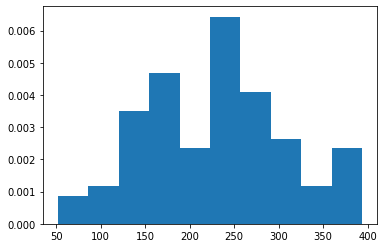

In [82]:
import matplotlib.pyplot as plt #comment every line they said
fig, ax = plt.subplots()        #it will be fun and useful. they said... (Offensichtliche Zeilen)
ax.hist(v_norm, density=True)   #plot histogram

**d)** Schreiben Sie eine Funktion, die als Argument ein array von Beträgen von Geschwindigkeiten und eine Temperatur annimmt und die Maxwell-Boltzmann Verteilung (Gleichung (1)) zurückgibt. Tipp: Sie können einen Array mit Werten mit gleichem Abstand mit ```np.arange``` erzeugen. Vergleichen Sie die theoretisch erwartete Verteilung mit Ihrer erzeugten in einem gemeinsamen Plot.  Kommentieren Sie jede Zeile des Codes sinnvoll.

(array([0.00087708, 0.00116944, 0.00350833, 0.00467778, 0.00233889,
        0.00643195, 0.00409306, 0.00263125, 0.00116944, 0.00233889]),
 array([ 51.8768604 ,  86.08112923, 120.28539805, 154.48966688,
        188.6939357 , 222.89820453, 257.10247335, 291.30674218,
        325.511011  , 359.71527983, 393.91954865]),
 <BarContainer object of 10 artists>)

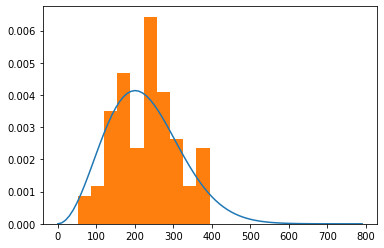

In [83]:
#define function for calculating the maxwell-boltzmann-distribution
def calc_MBDistr(v,T): #v:speed, T: temperature
    return 4*np.pi*v**2 * (m/(2*np.pi*k_B*T))**1.5 * np.exp((-1*m*v**2)/(2*k_B*T))

#generate evenly spaced array for speed
vs = np.arange(0,800,10)

#usual matplotlib fun
fig, ax = plt.subplots()

ax.plot(vs,calc_MBDistr(vs,T)) #plot the solution
ax.hist(v_norm, density=True)  #compare with histogram


Es ist erkennbar, dass das Histogramm eine Annäherung an die theoretisch ermittelte Maxwell-Boltzmann-Verteilung darstellt, diese allerdings (basierend auf den Zufallszahlen) noch nicht sehr gut ist.

**e)** Wiederholen Sie Aufgaben **a)**-**d)** für $N=10000$ Teilchen.  Optional können Sie auch die Temperatur auf $T=290$ ändern. 
Was stellen Sie fest?

Ich stelle fest, dass ...
die Zufallsverteilung eine deutlich bessere Annäherung an die theoretische Verteilung darstellt

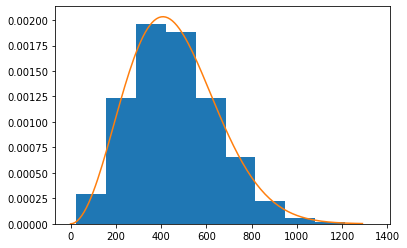

In [84]:
import numpy as np #ist alles vorbei, versuch's mit numpy

#generate random numbers
N2 = 10000
gauss2 = np.random.normal(0,1,(N2,3))

#define constants
k_B = 1.38 #Boltzmann Konstante
T2 = 290 #Temperatur
m = 4.8 * 10**-3 #Masse

#calc velocity
v2 = np.sqrt(k_B*T2/m)*gauss2

#calc speed (norm of velocity)
v_norm2 = np.linalg.norm(v2, axis=1)

import matplotlib.pyplot as plt #comment every line they said
fig, ax = plt.subplots()        #it will be fun and useful. they said (Offensichtlich)
ax.hist(v_norm2, density=True) #plot histogram

#define function for calculating the maxwell-boltzmann-distribution
def calc_MBDistr(v,T): #v:speed, T: temperature
    return 4*np.pi*v**2 * (m/(2*np.pi*k_B*T))**1.5 * np.exp((-1*m*v**2)/(2*k_B*T))

#generate evenly spaced array for speed
vs2 = np.arange(0,1300,10)

#usual matplotlib fun

ax.plot(vs2,calc_MBDistr(vs2,T2)) #plot the solution